In [ ]:
# 读取一个人的数据
# 标记对应的步态特征时刻
# 使用小波分析计算对应的特征时刻

In [1]:
import os
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [2]:
# 路径
path = "/Users/wangshuaibo/Library/CloudStorage/OneDrive-bsu.edu.cn/工作文档/北京悦动/脑卒中项目/阿帅笔记/HarbinStroke/Xsens/Process_Data/Excel/20230706_凌若飞_Xsens_无矫形器-1.xlsx"

In [6]:
excelfile = pd.ExcelFile(path, engine='openpyxl')

In [7]:
excelfile.sheet_names

['General Information',
 'Markers',
 'Segment Orientation - Quat',
 'Segment Orientation - Euler',
 'Segment Position',
 'Segment Velocity',
 'Segment Acceleration',
 'Segment Angular Velocity',
 'Segment Angular Acceleration',
 'Joint Angles ZXY',
 'Joint Angles XZY',
 'Ergonomic Joint Angles ZXY',
 'Ergonomic Joint Angles XZY',
 'Center of Mass',
 'Sensor Free Acceleration',
 'Sensor Magnetic Field',
 'Sensor Orientation - Quat',
 'Sensor Orientation - Euler']

In [8]:
seg_pos = pd.read_excel(path,sheet_name='Segment Position')

In [9]:
seg_pos.columns

Index(['Frame', 'Pelvis x', 'Pelvis y', 'Pelvis z', 'L5 x', 'L5 y', 'L5 z',
       'L3 x', 'L3 y', 'L3 z', 'T12 x', 'T12 y', 'T12 z', 'T8 x', 'T8 y',
       'T8 z', 'Neck x', 'Neck y', 'Neck z', 'Head x', 'Head y', 'Head z',
       'Right Shoulder x', 'Right Shoulder y', 'Right Shoulder z',
       'Right Upper Arm x', 'Right Upper Arm y', 'Right Upper Arm z',
       'Right Forearm x', 'Right Forearm y', 'Right Forearm z', 'Right Hand x',
       'Right Hand y', 'Right Hand z', 'Left Shoulder x', 'Left Shoulder y',
       'Left Shoulder z', 'Left Upper Arm x', 'Left Upper Arm y',
       'Left Upper Arm z', 'Left Forearm x', 'Left Forearm y',
       'Left Forearm z', 'Left Hand x', 'Left Hand y', 'Left Hand z',
       'Right Upper Leg x', 'Right Upper Leg y', 'Right Upper Leg z',
       'Right Lower Leg x', 'Right Lower Leg y', 'Right Lower Leg z',
       'Right Foot x', 'Right Foot y', 'Right Foot z', 'Right Toe x',
       'Right Toe y', 'Right Toe z', 'Left Upper Leg x', 'Left Upper Leg

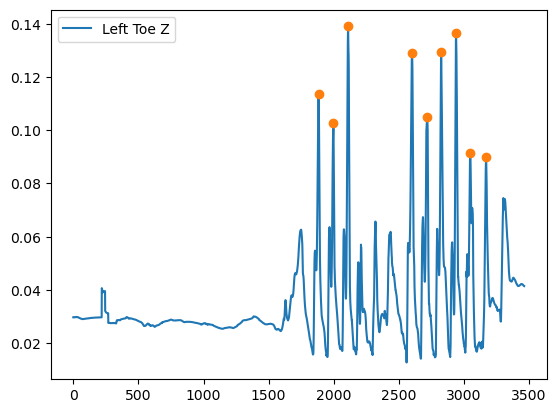

In [71]:
L_Toe_z = seg_pos['Left Toe z']
seg_pos_peaks, _ = find_peaks(L_Toe_z, height=0.08)
plt.plot(L_Toe_z, label="Left Toe Z")
plt.plot(seg_pos_peaks, L_Toe_z[seg_pos_peaks],"o")
plt.legend()

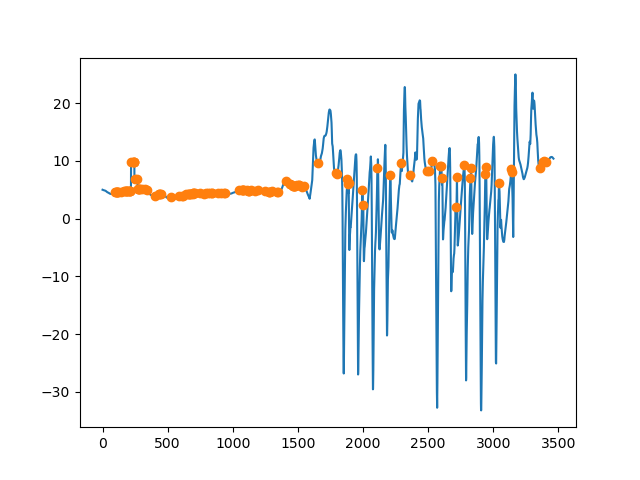

In [125]:
joint_angels = pd.read_excel(path,sheet_name="Joint Angles ZXY")
joint_angels.columns
L_Ankle_D = joint_angels['Left Ankle Dorsiflexion/Plantarflexion']

angle_peaks, _ = find_peaks(L_Ankle_D,height=[0,10])
plt.plot(L_Ankle_D)
plt.plot(angle_peaks,L_Ankle_D[angle_peaks],"o")

凌若飞有矫形器第一次测试

- 左脚第一次着地	左脚第二次着地	左脚第三次着地	
- 1890	2003	2119	
- 右脚第一次着地	右脚第二次着地	右脚第三次着地
- 1944	2057	2168

In [ ]:
events = [1890, 2003, 2119]

In [104]:
%matplotlib widget

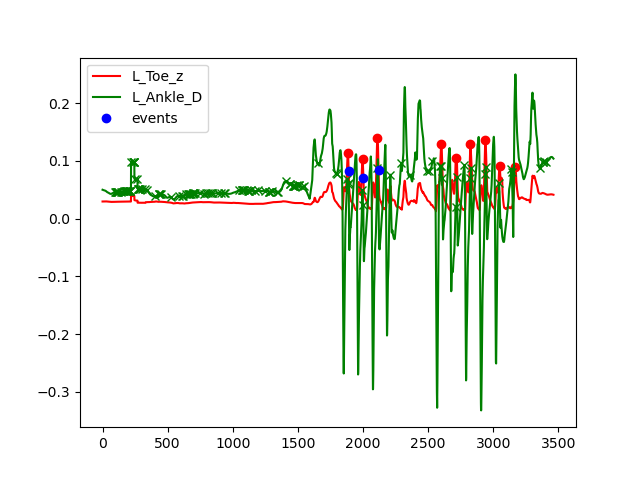

In [123]:
# 特征时刻在脚趾高度曲线上的位置

# 根据脚趾位置查找特征时刻
plt.plot(L_Toe_z, label="L_Toe_z", color="red")
plt.plot(seg_pos_peaks,L_Toe_z[seg_pos_peaks],"o", color="red")

# 根据脚踝角度查找特征时刻
plt.plot(L_Ankle_D/100,label="L_Ankle_D",color="green")
plt.plot(angle_peaks, L_Ankle_D[angle_peaks]/100,"x", color="green") 

# 根据肉眼判断特征时刻
plt.plot(events,L_Toe_z[events],"o",label="events",color="blue")
plt.legend()

## 小波分析

In [126]:
sample_rate = 100
y = L_Ankle_D
from scipy import signal, integrate
import pywt
# 连续小波变化尺度因子（scale parameters）
scale_cwt = float(sample_rate) / 5

# 连续梯形积分（cumulative trapezoidal integration）
integrated_data = integrate.cumtrapz(y)

# 高斯连续小波变化
cwt, freqs = pywt.cwt(integrated_data, scale_cwt, "gaus1")
differentiated_data = cwt[0]

Text(0.5, 1.0, '20230907_小波变化结果')

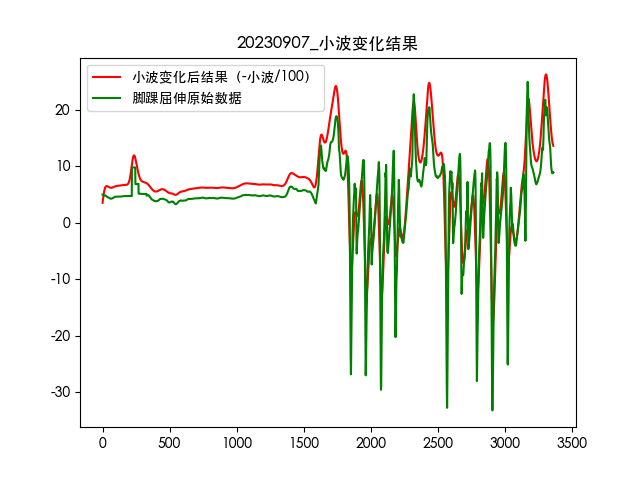

In [158]:
plt.close()
plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

plt.plot(-cwt[0][0:-100]/100,"r",label="小波变化后结果（-小波/100）")
plt.plot(y[0:-100],"g",label="脚踝屈伸原始数据")
plt.legend()
plt.title("20230907_小波变化结果")

In [ ]:
def cwt(y, sample_rate):
    from scipy import signal, integrate
    import pywt
    # 连续小波变化尺度因子（scale parameters）
    scale_cwt = float(sample_rate) / 5

    # 连续梯形积分（cumulative trapezoidal integration）
    integrated_data = integrate.cumtrapz(y)

    # 高斯连续小波变化
    cwt, freqs = pywt.cwt(integrated_data, scale_cwt, "gaus1")
    differentiated_data = cwt[0]

